In [3]:
import pandas as pd

# Load your chats dataset
df_chats = pd.read_csv("cleaned_data/chats_final.csv")

# Convert created_at to datetime
df_chats["created_at"] = pd.to_datetime(df_chats["created_at"], errors="coerce")

# Group by date and count messages
df_daily = df_chats.groupby(df_chats["created_at"].dt.date).size().reset_index(name="message_count")

# Rename columns for Prophet compatibility
df_daily.rename(columns={"created_at": "ds", "message_count": "y"}, inplace=True)

print(df_daily.head())


           ds    y
0  2024-08-19  155
1  2024-08-20   10
2  2024-08-22    2
3  2024-08-23    2
4  2024-08-25    1


In [5]:
print(df_daily['ds'].min())
print(df_daily['ds'].max())

2024-08-19
2025-07-12


In [6]:
# prophet model
from prophet import Prophet
import matplotlib.pyplot as plt

model = Prophet(daily_seasonality=True)

model.fit(df_daily)

future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

22:33:17 - cmdstanpy - INFO - Chain [1] start processing
22:33:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
224,2025-08-02,-52.042070,-199.873106,96.982580
225,2025-08-03,-31.640221,-189.804882,128.687682
226,2025-08-04,-50.720825,-207.043208,101.725069
227,2025-08-05,-23.527558,-177.491135,131.803379
228,2025-08-06,-50.693027,-195.904619,102.587393
229,2025-08-07,-59.678429,-215.023338,93.430225
230,2025-08-08,-54.765872,-201.845248,86.679012
231,2025-08-09,-54.246303,-205.427176,96.612783
232,2025-08-10,-33.844455,-184.582864,112.081527
233,2025-08-11,-52.925059,-199.505446,101.312709


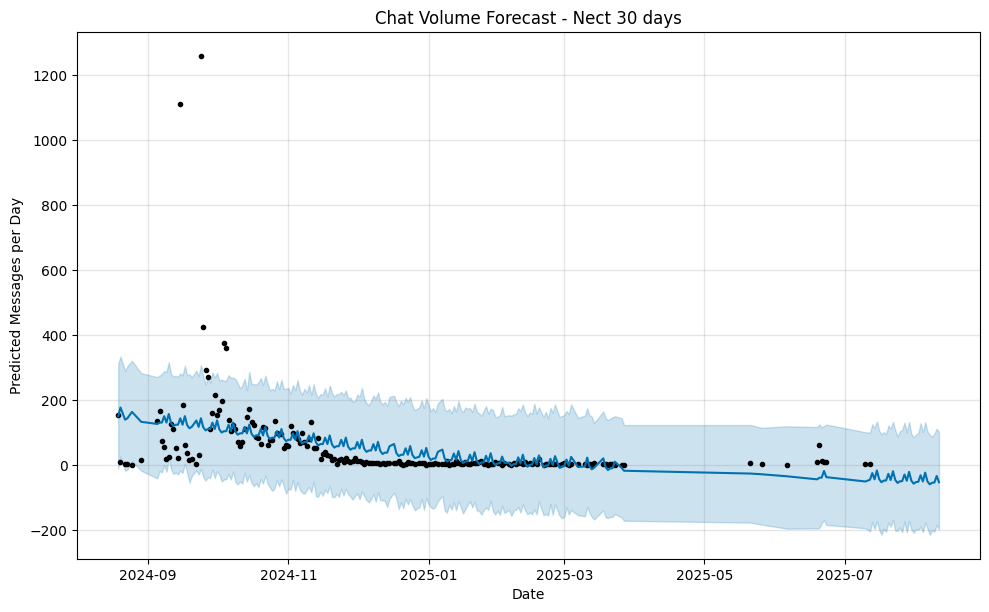

In [ ]:
#plot forecast
fig1 = model.plot(forecast)
plt.title("Chat Volume Forecast - Next 30 days")
plt.xlabel("Date")
plt.ylabel("Predicted Messages per Day")
plt.show()


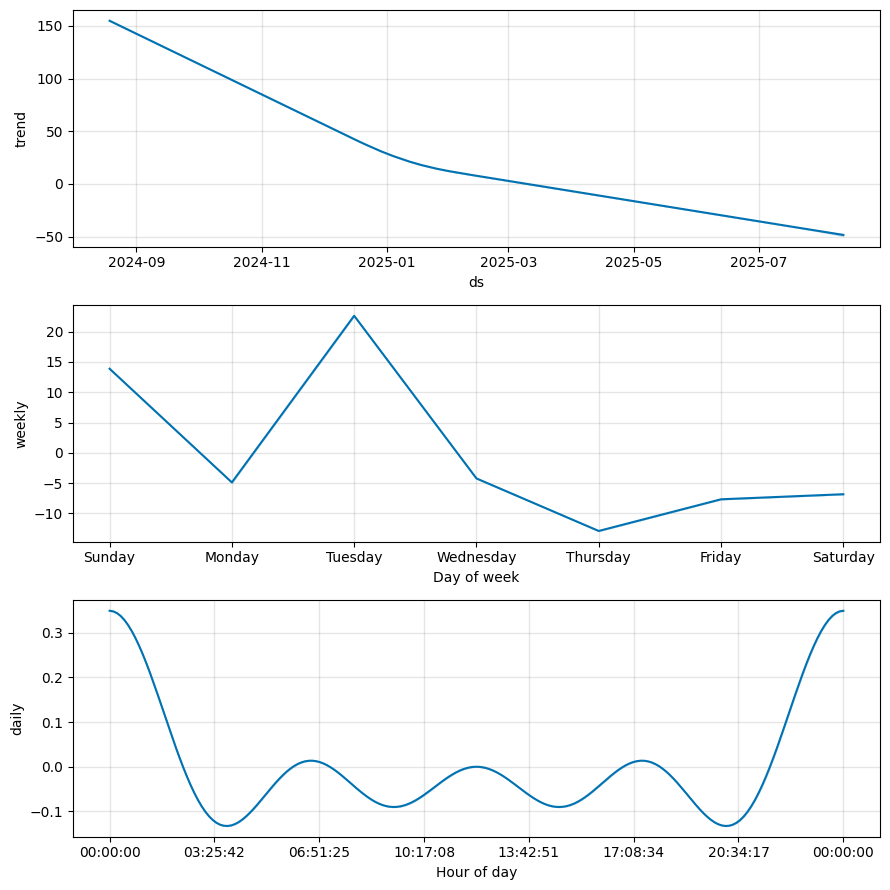

In [8]:
fig2 = model.plot_components(forecast)
plt.show()